MCT Testing Notebook

In [1]:
# import
import sys
sys.path.append("C:\Program Files\FirstLightImaging\FliSdk\Python\demo")
import FliSdk_V2 as sdk
import derpy as dp
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

<>:3: SyntaxWarning: invalid escape sequence '\P'
<>:3: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Brewster\AppData\Local\Temp\ipykernel_18704\2589569057.py:3: SyntaxWarning: invalid escape sequence '\P'
  sys.path.append("C:\Program Files\FirstLightImaging\FliSdk\Python\demo")


In [471]:
cam.close()

In [2]:
# connect to the camera
cam = dp.CRED2(set_temperature = -40, fps = 100, tint = 0.1, temp_tolerance = 0.5, conversion_gain = 'high')

Updating...
Sensor Temperature: -39.92C
Motherboard Temperature: 45.5C
Frontend Temperature: 49.5C
Powerboard Temperature: 54.25C
Peltier Temperature: 17.67C
Heatsink Temperature: 51.91C
***********************
Sensor Temperature: -39.92C
Motherboard Temperature: 45.5C
Frontend Temperature: 49.5C
Powerboard Temperature: 54.25C
Peltier Temperature: 17.67C
Heatsink Temperature: 51.91C
***********************
Final Sensor Temperature -39.92C
Current camera tint: 0.102394ms


In [3]:
# sdk.FliCredTwo.EnableBadPixel(cam.context, True)
# cam.fps  = 15
# cam.tint = 1
# cam.conversion_gain = 'lo'

Current camera tint: 0.010926ms


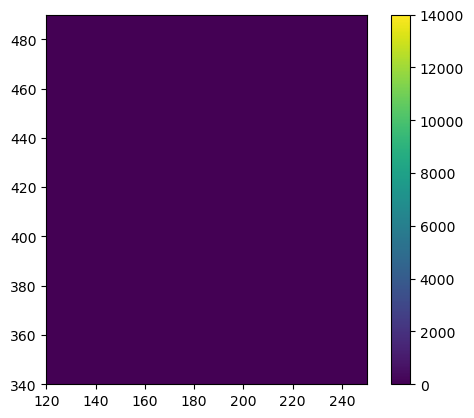

In [464]:
# running data collection

# parameters
sdk.FliCredTwo.EnableBadPixel(cam.context, True)
cam.fps  = 15
cam.tint = 0.01#1

# take frame
image = cam.take_median_image(10)
plt.imshow(image,vmin=0,vmax=14000)
# print(cam.tint)
plt.xlim(120,250)
plt.ylim(340,490)
# plt.axhline(361)
plt.colorbar()
plt.show()
# save 
wv = '1780'
type = 'dark'#'dark'#'nocoro'#'coro'
expt = str(round(cam.tint,2))+'ms'
# print(expt)
date = '071525'
np.savetxt("C:\\Users\\Brewster\\Desktop\\MCT_data_071025\\"+date+"_wv_"+wv+"nm_"+type+"_expt_"+expt+"pow_7p.txt",image)
# save as fits

hdu = fits.PrimaryHDU(image)
hdu.writeto("C:\\Users\\Brewster\\Desktop\\MCT_data_071025\\"+date+"_wv_"+wv+"nm_"+type+"_expt_"+expt+"pow_7p.fits", overwrite=True)


In [465]:
#1480, 1530, 1580, 1620, 1650, 1670, 1700, 1740, 1780

(160.0, 210.0)

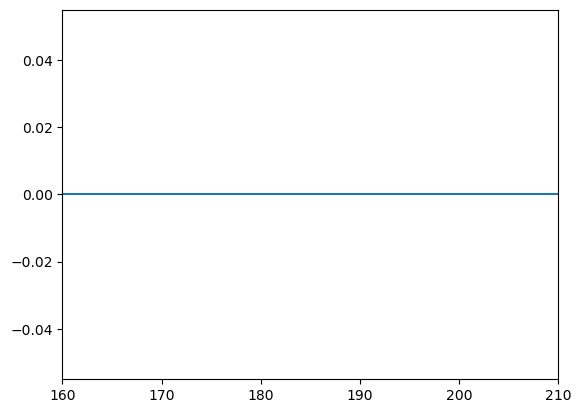

In [466]:
plt.plot(image[418])
plt.xlim(160,210)

In [467]:
imagec = np.loadtxt("C:\\Users\\Brewster\\Desktop\\MCT_data_071025\\"+date+"_wv_"+wv+"nm_nocoro_expt_"+expt+"pow_7p.txt")
imaged = np.loadtxt("C:\\Users\\Brewster\\Desktop\\MCT_data_071025\\"+date+"_wv_"+wv+"nm_dark_expt_"+expt+"pow_7p.txt")



In [468]:
print(np.max(imagec - imaged))

12118.0


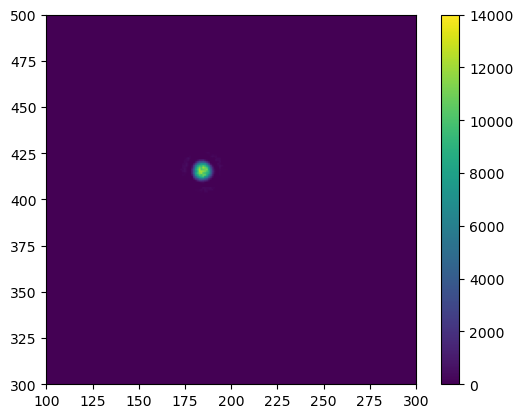

In [469]:
plt.imshow(imagec-imaged,vmin=0,vmax=14000)

# plt.xlim(160,210)
# plt.ylim(390,440)

plt.xlim(100,300)
plt.ylim(300,500)
plt.colorbar()
plt.show()

(100.0, 300.0)

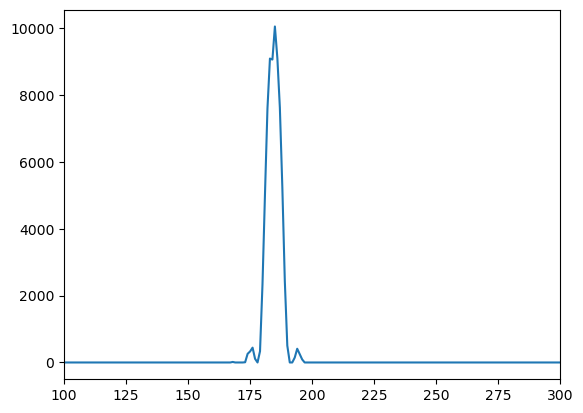

In [470]:
plt.plot((imagec-imaged)[418])
plt.xlim(100,300)